In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df1=pd.read_csv(r"C:\Users\User\Desktop\mnist.csv")

In [5]:
df=df1.values    # to change df1 to numpy array df

In [6]:
df1.info()  #info() works only for a csv file, not for a numpy array

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
df1.shape # shape works for both csv file as well as numpy array

(42000, 785)

In [8]:
df.shape

(42000, 785)

In [9]:
X=df[:,1:]  #after column 1 including column 1     #input as 784 pixels
X.shape

(42000, 784)

In [10]:
Y=df[:,0]    # output as a label

In [11]:
def draw(sample):
    img=sample.reshape([28,28])   # turns the 1D array into 2D array of the given shape
    plt.imshow(img,cmap="gray")
    plt.show()


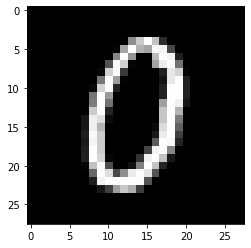

In [12]:
draw(X[5])

In [13]:
print(Y[5])

0


In [14]:
split=int(X.shape[0]*0.8)    #80/20 split

In [15]:
X_train=X[:split,:]     
X_test=X[split:,:]

In [16]:
Y_train=Y[:split]
Y_test=Y[split:]

In [17]:
print(X_train.shape,Y_train.shape)

(33600, 784) (33600,)


In [18]:
print(X_test.shape,Y_test.shape)

(8400, 784) (8400,)


In [19]:
def distance(x1,x2):
    dist1=np.sqrt(sum((x1-x2)**2))
    return dist1

In [20]:
def knn(X,Y,query,k=5):
    vals=[]
    m=X.shape[0]  #shape[0]=no of rows, shape[1]=no of columns
    for i in range(m):
        dist=distance(X[i],query) #including 1 and after that
        vals.append([dist,Y[i]])   #vals becomes a list with 2 columns, first containing dist, nd 2nd the labels of the pts
    vals=sorted(vals)     #sorts vals
    vals=vals[:k]     #taking all rows before k
    vals=np.array(vals)
    new_val=np.unique(vals[:,1],return_counts=True)
    index=new_val[1].argmax()  #argmax is used to return the index of the highest value in new_value
    ans=new_val[0][index]     #goes to the unique elements(0,1) here and selects the element with the index
    return(ans)

In [23]:
inp=int(input("enter your choice of label to be checked in test case: "))

enter your choice of label to be checked in test case: 5


In [24]:
pred=knn(X_train,Y_train,X_test[inp],k=20)
print(pred,Y_test[inp])     # to see whether the prediction and the label shown by Y_train matches or not

6.0 6


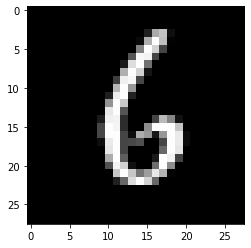

In [25]:
draw(X_test[inp])